In [1]:
##Folder to print results
folder_results = "Results/Montpellier"
folder_station = "../mystations"
##Station
file = [folder_station * "/" * typedata * "_Montpellier.txt" for typedata in ["TN", "TX"]]

##AR model
p = 1
method_ = "monthly"
periodicity_model = "trigo"       # "trigo", "smooth", "autotrigo", "stepwise_trigo"
degree_period = 8                     # 0 => default value -> "trigo" : 5, "smooth" : 9, "autotrigo" : 50, "stepwise_trigo" : 50
Trendtype = "LOESS"                   # "LOESS", "polynomial", "null" (for no additive trend)
trendparam = nothing                  # nothing => default value -> "LOESS" : 0.08, "polynomial" : 1
σ_periodicity_model = "trigo"     # "trigo", "smooth", "autotrigo", "stepwise_trigo", "null" (for no multiplicative periodicity)
σ_degree_period = 8                   # 0 => default value -> "trigo" : 5, "smooth" : 9, "autotrigo" : 50, "stepwise_trigo" : 50
σ_Trendtype = "LOESS"                 # "LOESS", "polynomial", "null" (for no multiplicative trend)
σ_trendparam = nothing                # nothing => default value -> "LOESS" : 0.08, "polynomial" : 1

##Simulations
n = 100

100

In [2]:
include("table_reader.jl")
include("utils/Missing_values.jl")
include("utils/Structure.jl")
include("utils/Plotting.jl")
cd(@__DIR__)

ERROR: LoadError: too many parameters for type AbstractInterpolation
Stacktrace:
 [1] top-level scope
   @ C:\Users\goninarn\.julia\packages\SparseConnectivityTracer\litqn\ext\SparseConnectivityTracerDataInterpolationsExt.jl:28
 [2] include
   @ .\Base.jl:557 [inlined]
 [3] include_package_for_output(pkg::Base.PkgId, input::String, depot_path::Vector{String}, dl_load_path::Vector{String}, load_path::Vector{String}, concrete_deps::Vector{Pair{Base.PkgId, UInt128}}, source::String)
   @ Base .\loading.jl:2881
 [4] top-level scope
   @ stdin:6
in expression starting at C:\Users\goninarn\.julia\packages\SparseConnectivityTracer\litqn\ext\SparseConnectivityTracerDataInterpolationsExt.jl:3
in expression starting at stdin:6
┌ Error: Error during loading of extension SparseConnectivityTracerDataInterpolationsExt of SparseConnectivityTracer, use `Base.retry_load_extensions()` to retry.
│   exception = 1-element ExceptionStack:
Failed to precompile SparseConnectivityTracerDataInterpolationsExt [

In [3]:
settings = OrderedDict((("file", file),
    ("p", p),
    ("method_", method_),
    ("periodicity_model", periodicity_model),
    ("degree_period", degree_period),
    ("Trendtype", Trendtype),
    ("trendparam", trendparam),
    ("σ_periodicity_model", σ_periodicity_model),
    ("σ_degree_period", σ_degree_period),
    ("σ_Trendtype", σ_Trendtype),
    ("σ_trendparam", σ_trendparam),
    ("n", n)))

OrderedDict{String, Any} with 12 entries:
  "file"                => ["../mystations/TN_Montpellier.txt", "../mystations/…
  "p"                   => 1
  "method_"             => "monthly"
  "periodicity_model"   => "trigo"
  "degree_period"       => 8
  "Trendtype"           => "LOESS"
  "trendparam"          => nothing
  "σ_periodicity_model" => "trigo"
  "σ_degree_period"     => 8
  "σ_Trendtype"         => "LOESS"
  "σ_trendparam"        => nothing
  "n"                   => 100

In [4]:
series_vec = truncate_MV.(extract_series.(file))
date_vec, x = Common_indexes(series_vec)

Caracteristics_Series_vec = init_CaracteristicsSeries.(series_vec)

2-element Vector{CaracteristicsSeries}:
 CaracteristicsSeries([2.7129870129870137, 2.6025974025974032, 2.4688311688311684, 2.583116883116883, 1.7454545454545447, 2.0909090909090917, 1.846753246753246, 1.8402597402597405, 2.106493506493506, 2.6259740259740254  …  3.3259740259740265, 3.9220779220779223, 3.511688311688312, 2.98961038961039, 2.594805194805195, 2.2194805194805194, 2.7857142857142856, 2.8000000000000016, 2.757142857142857, 2.8909090909090915], [11.9, 11.2, 9.5, 12.3, 10.8, 10.5, 12.2, 11.5, 10.6, 10.6  …  13.3, 13.0, 11.4, 12.4, 12.3, 11.0, 12.8, 14.3, 11.1, 11.2], 12×4 DataFrame
 Row │ MONTH  MONTHLY_MEAN  MONTHLY_STD  MONTHLY_MAX 
     │ Int64  Float64       Float64      Float64     
─────┼───────────────────────────────────────────────
   1 │     1       2.42266      4.33502         14.5
   2 │     2       3.14257      4.35576         15.3
   3 │     3       5.50913      3.69526         15.1
   4 │     4       8.25918      2.98022         17.3
   5 │     5      11.8933   

In [5]:
Model = fit_Multi_AR(x, date_vec,
    p=p,
    method_=method_,
    periodicity_model=periodicity_model,
    degree_period=degree_period,
    Trendtype=Trendtype,
    trendparam=trendparam,
    σ_periodicity_model=σ_periodicity_model,
    σ_degree_period=σ_degree_period,
    σ_Trendtype=σ_Trendtype,
    σ_trendparam=σ_trendparam)

sample_ = rand(Model, n)


100-element Vector{Matrix{Float64}}:
 [2.0 5.800000000000002; -2.372515101738839 4.635035196094627; … ; -1.2757899596098898 8.892545250367476; -1.3845241787973723 10.118506486334848]
 [2.0 5.800000000000002; -2.8751554421134276 2.4862078088746395; … ; 3.2415542753337525 9.054449094621567; 2.9740955494245367 6.891849019710106]
 [2.0 5.800000000000002; -3.3087795423617026 8.011594221787297; … ; -0.8460340738458445 9.930800900037909; 4.64606145528935 9.121776603985907]
 [2.0 5.800000000000002; 5.792038325792094 10.114291002788487; … ; -2.579674933103534 9.843790955826663; -3.2723823456985706 10.0796634446686]
 [2.0 5.800000000000002; 2.107696676017208 6.073426630501641; … ; 15.979944396630877 14.134985886845158; 16.327545493194606 18.442582255456934]
 [2.0 5.800000000000002; -3.7396618494488925 3.151694144873563; … ; 5.941994054879522 11.92504710831207; 0.09179555089344671 10.442293368471894]
 [2.0 5.800000000000002; 6.418189602638113 8.036603910786912; … ; 7.537551279704711 13.7556419646

In [6]:
include("utils/Plotting.jl")

Sample_diagnostic (generic function with 3 methods)

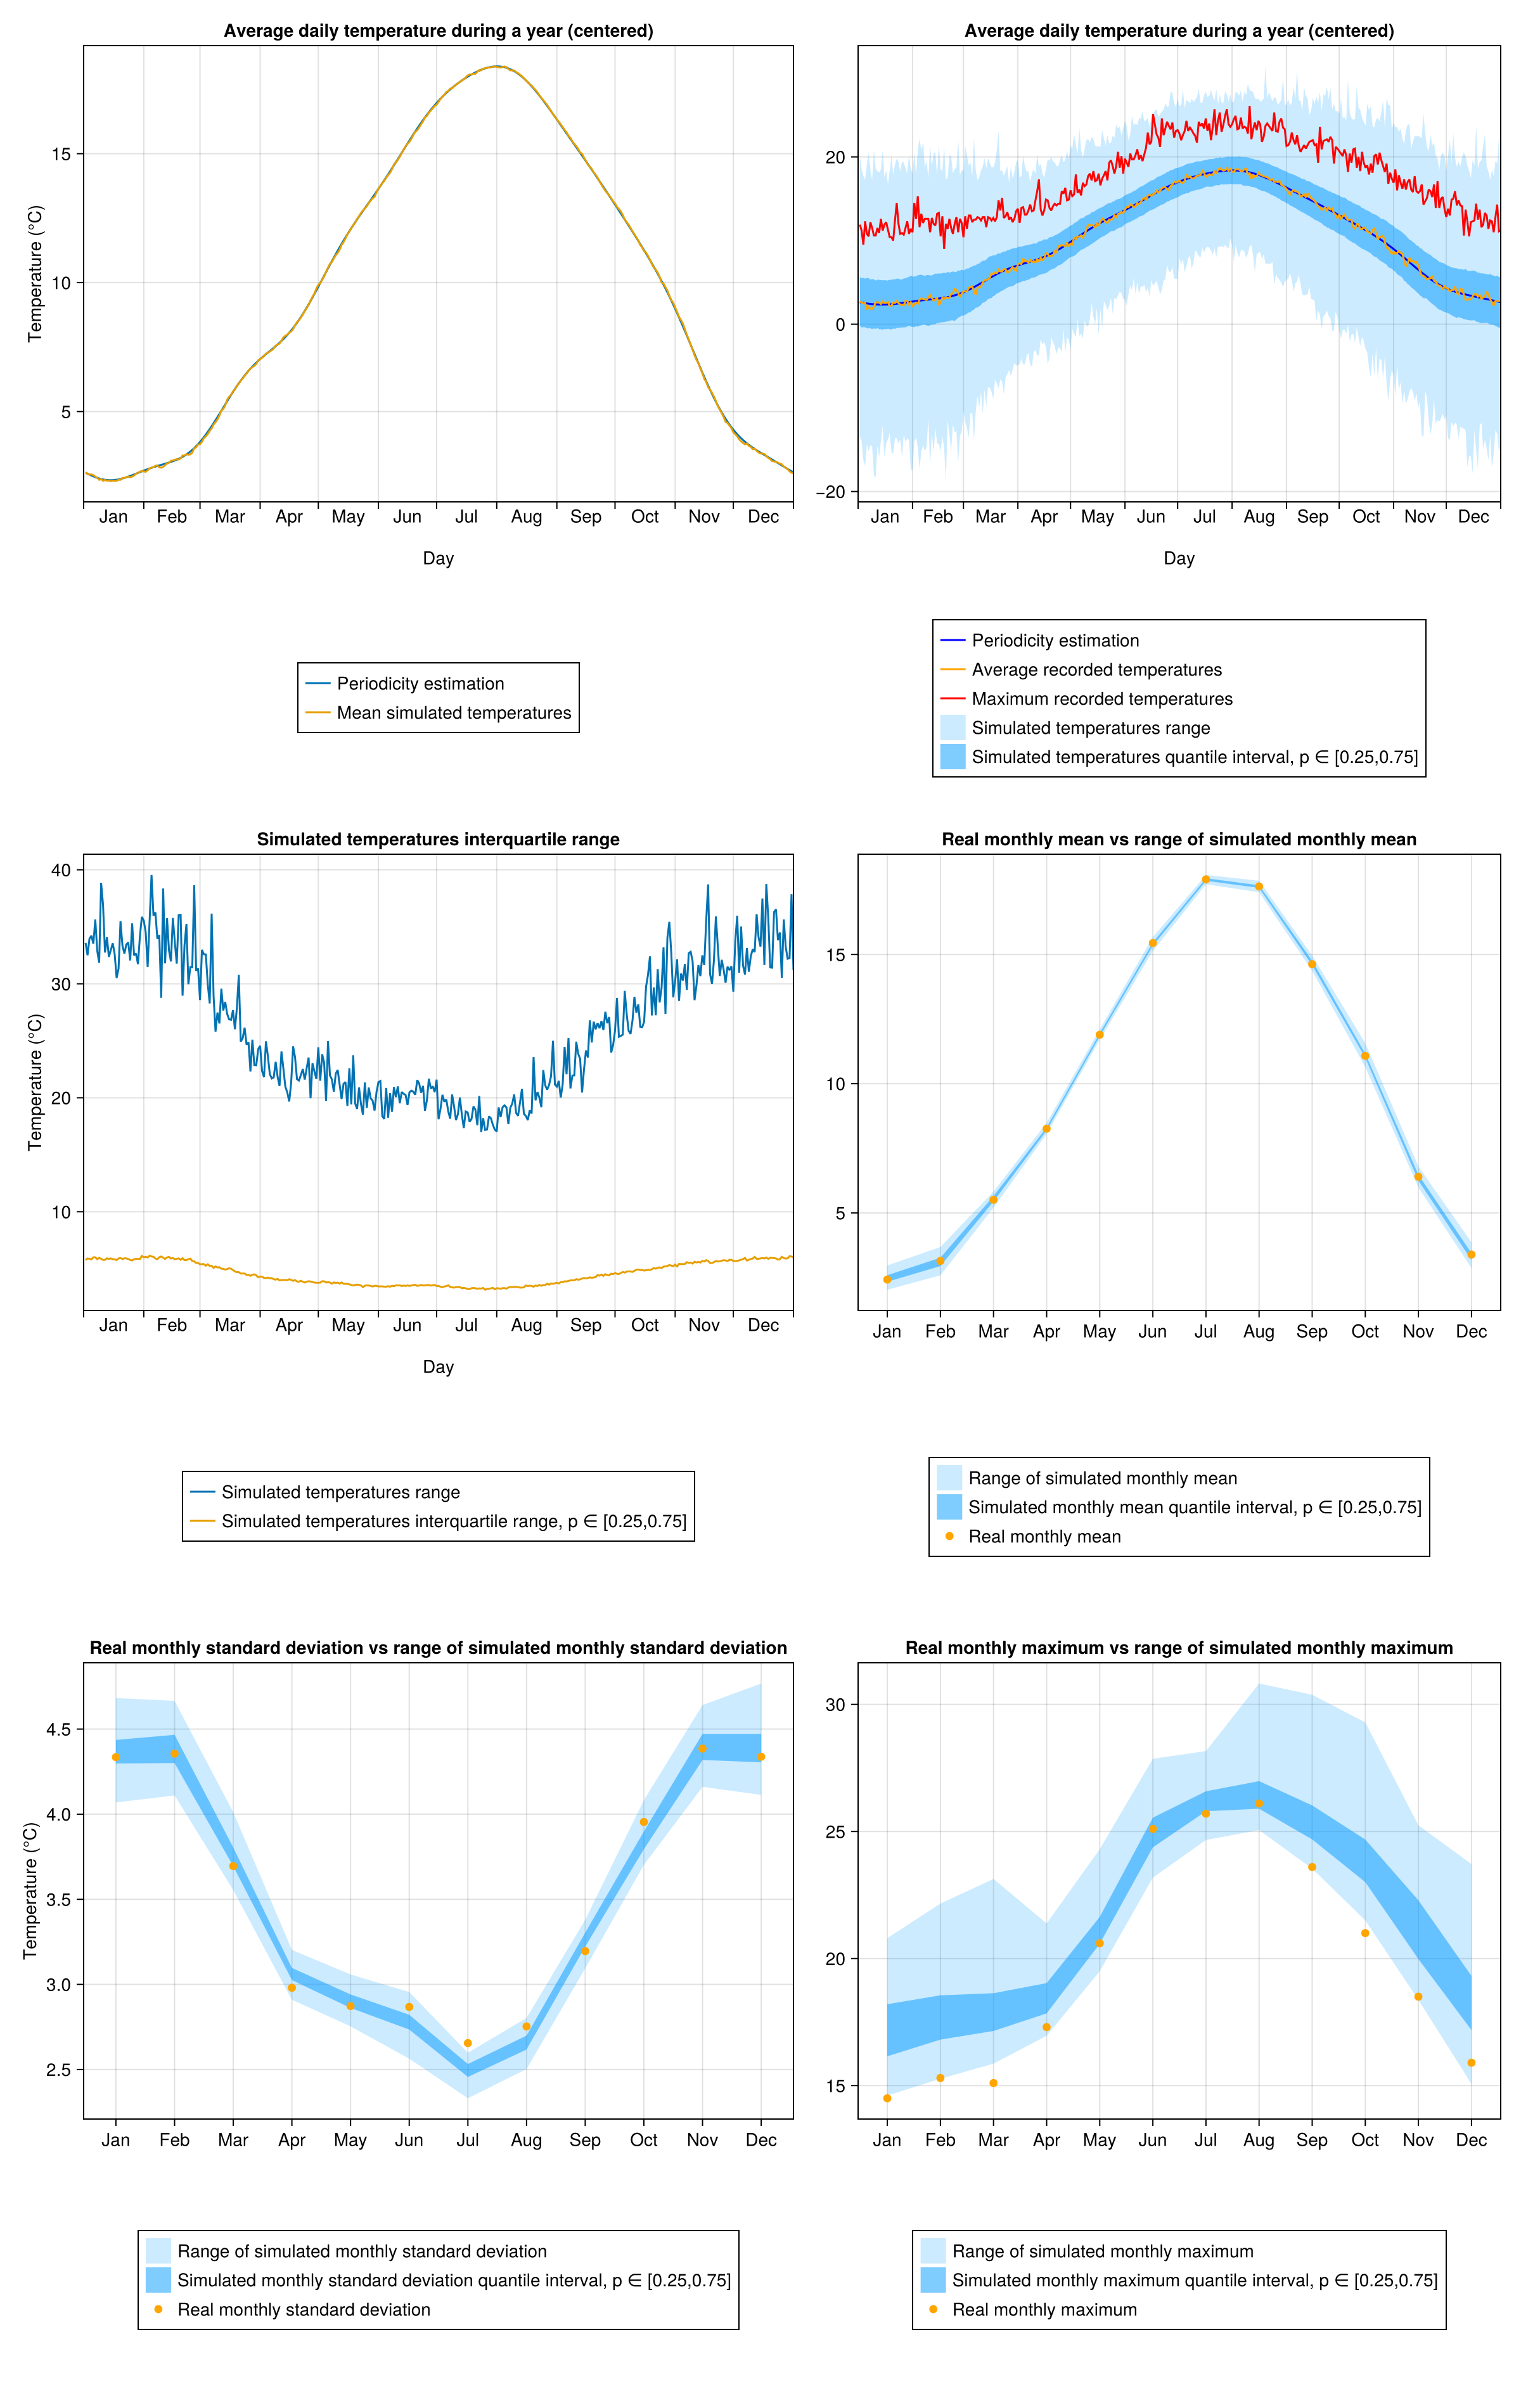

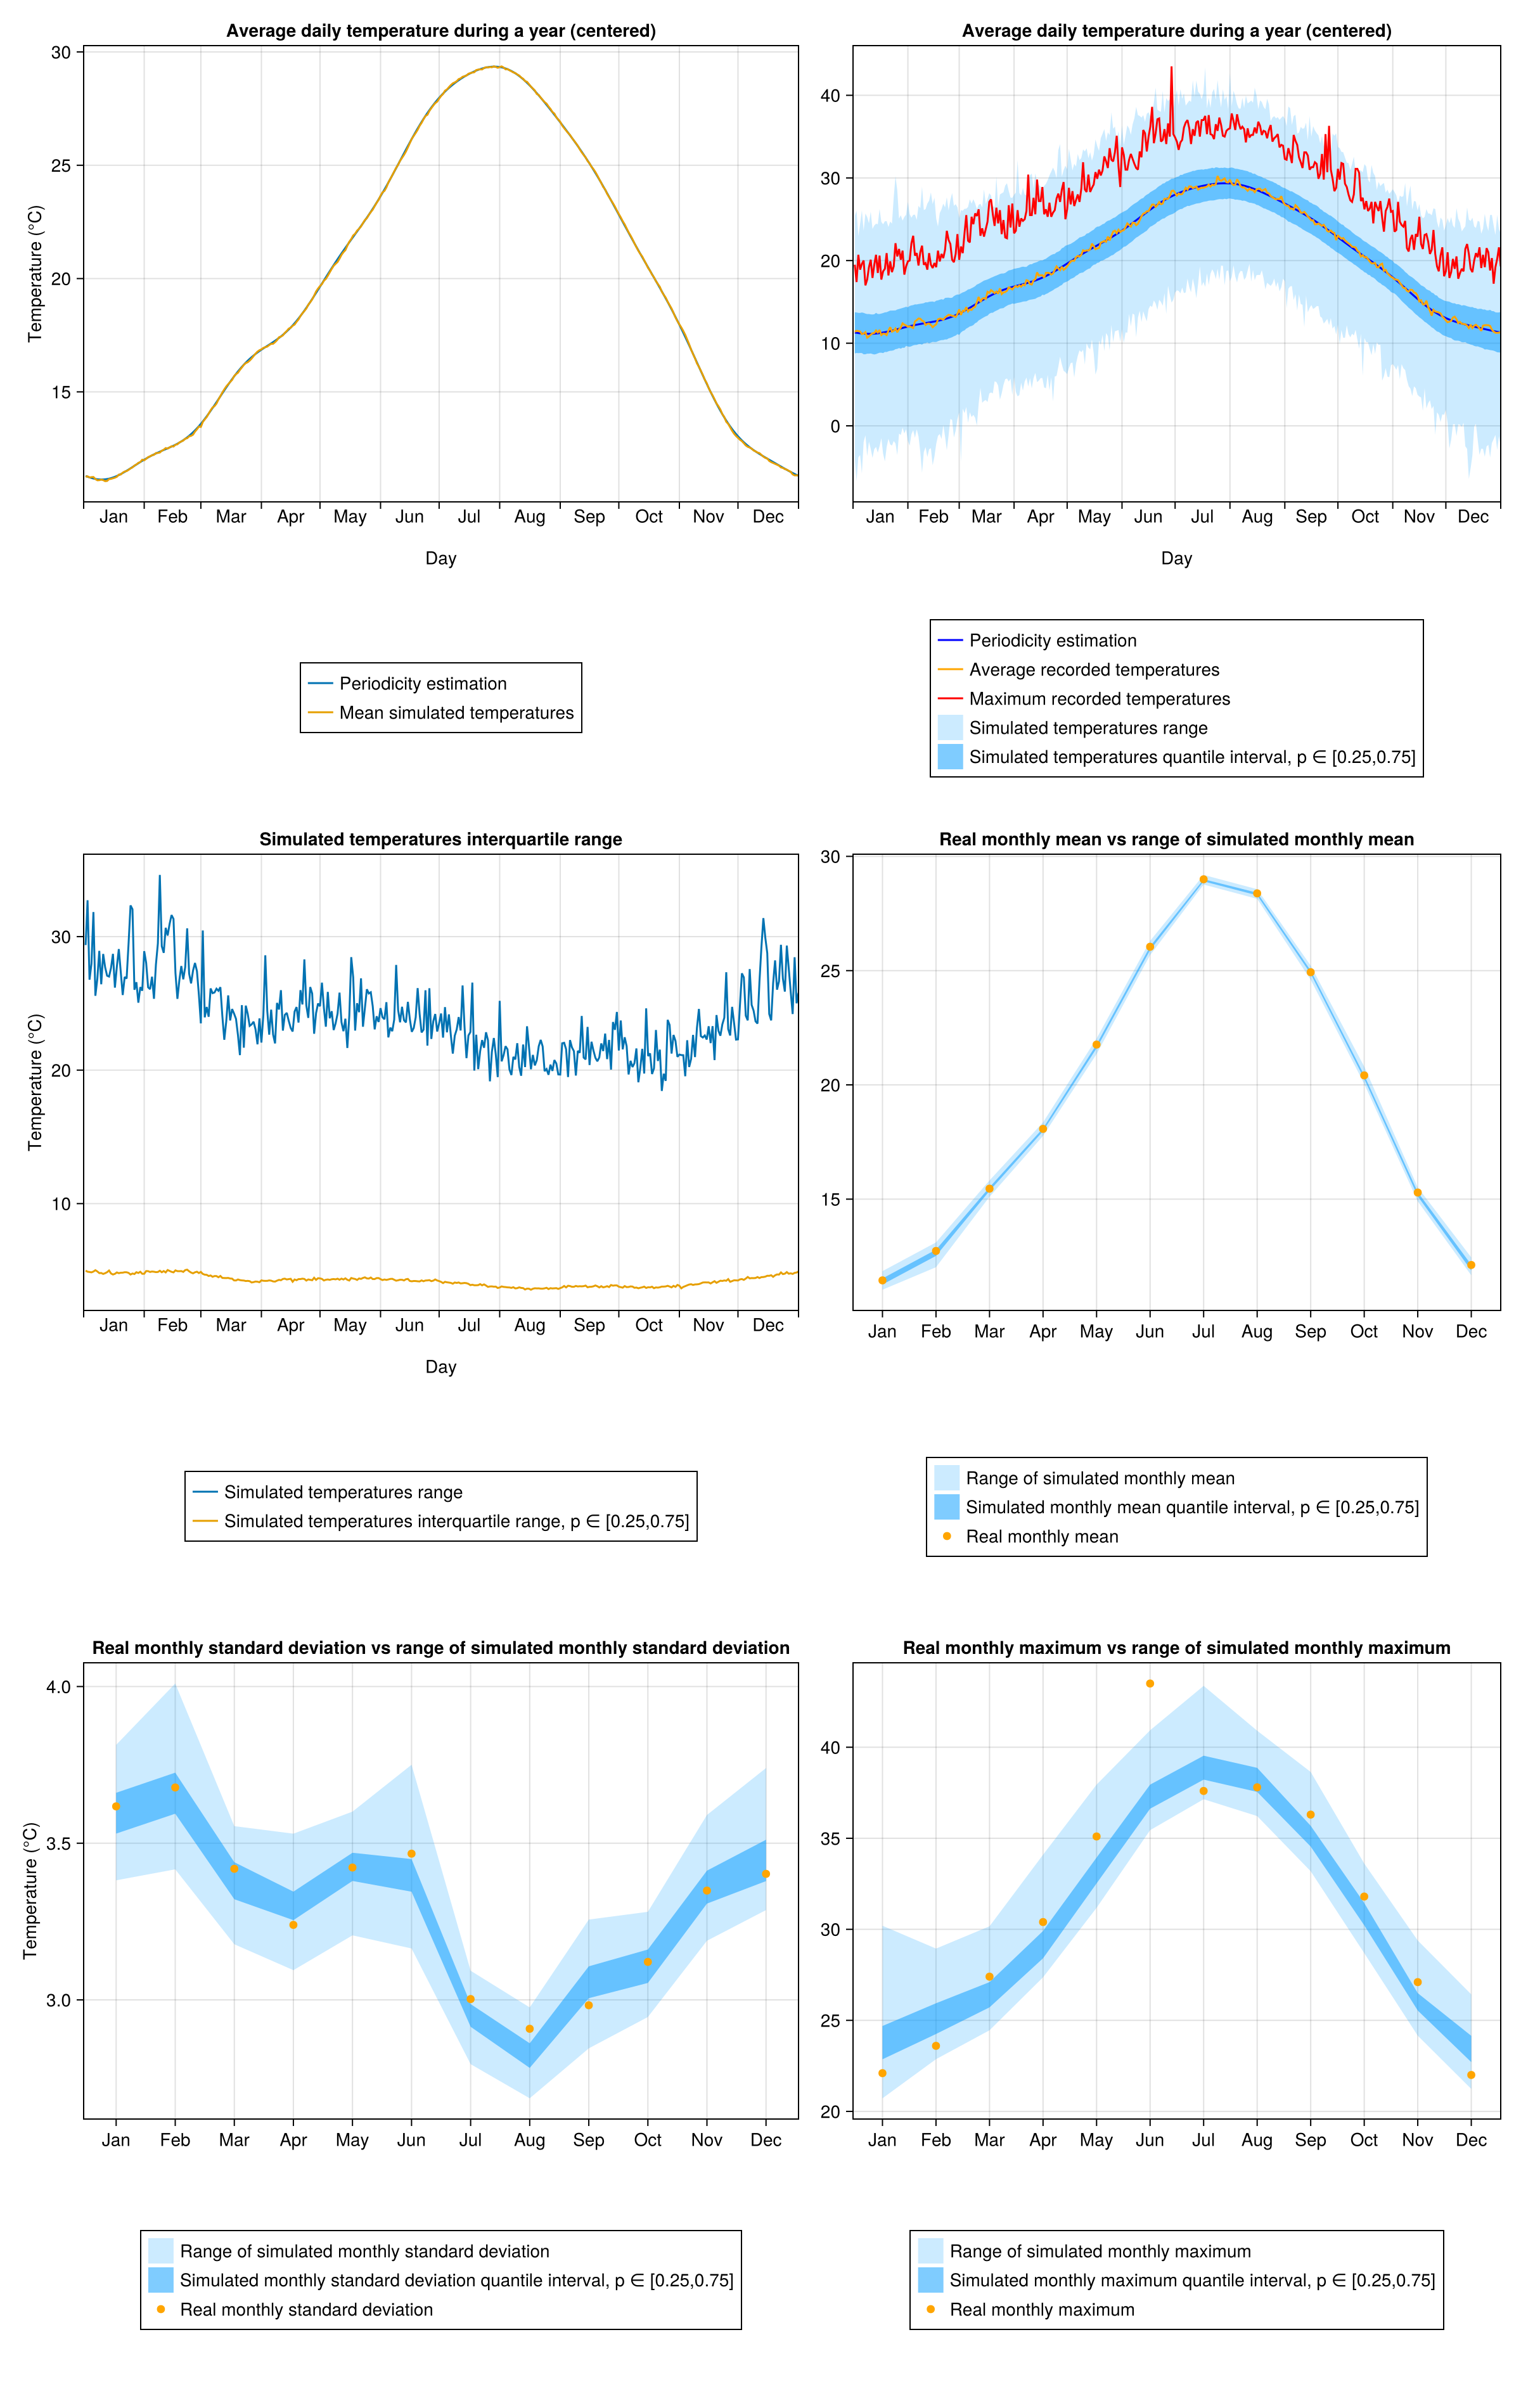

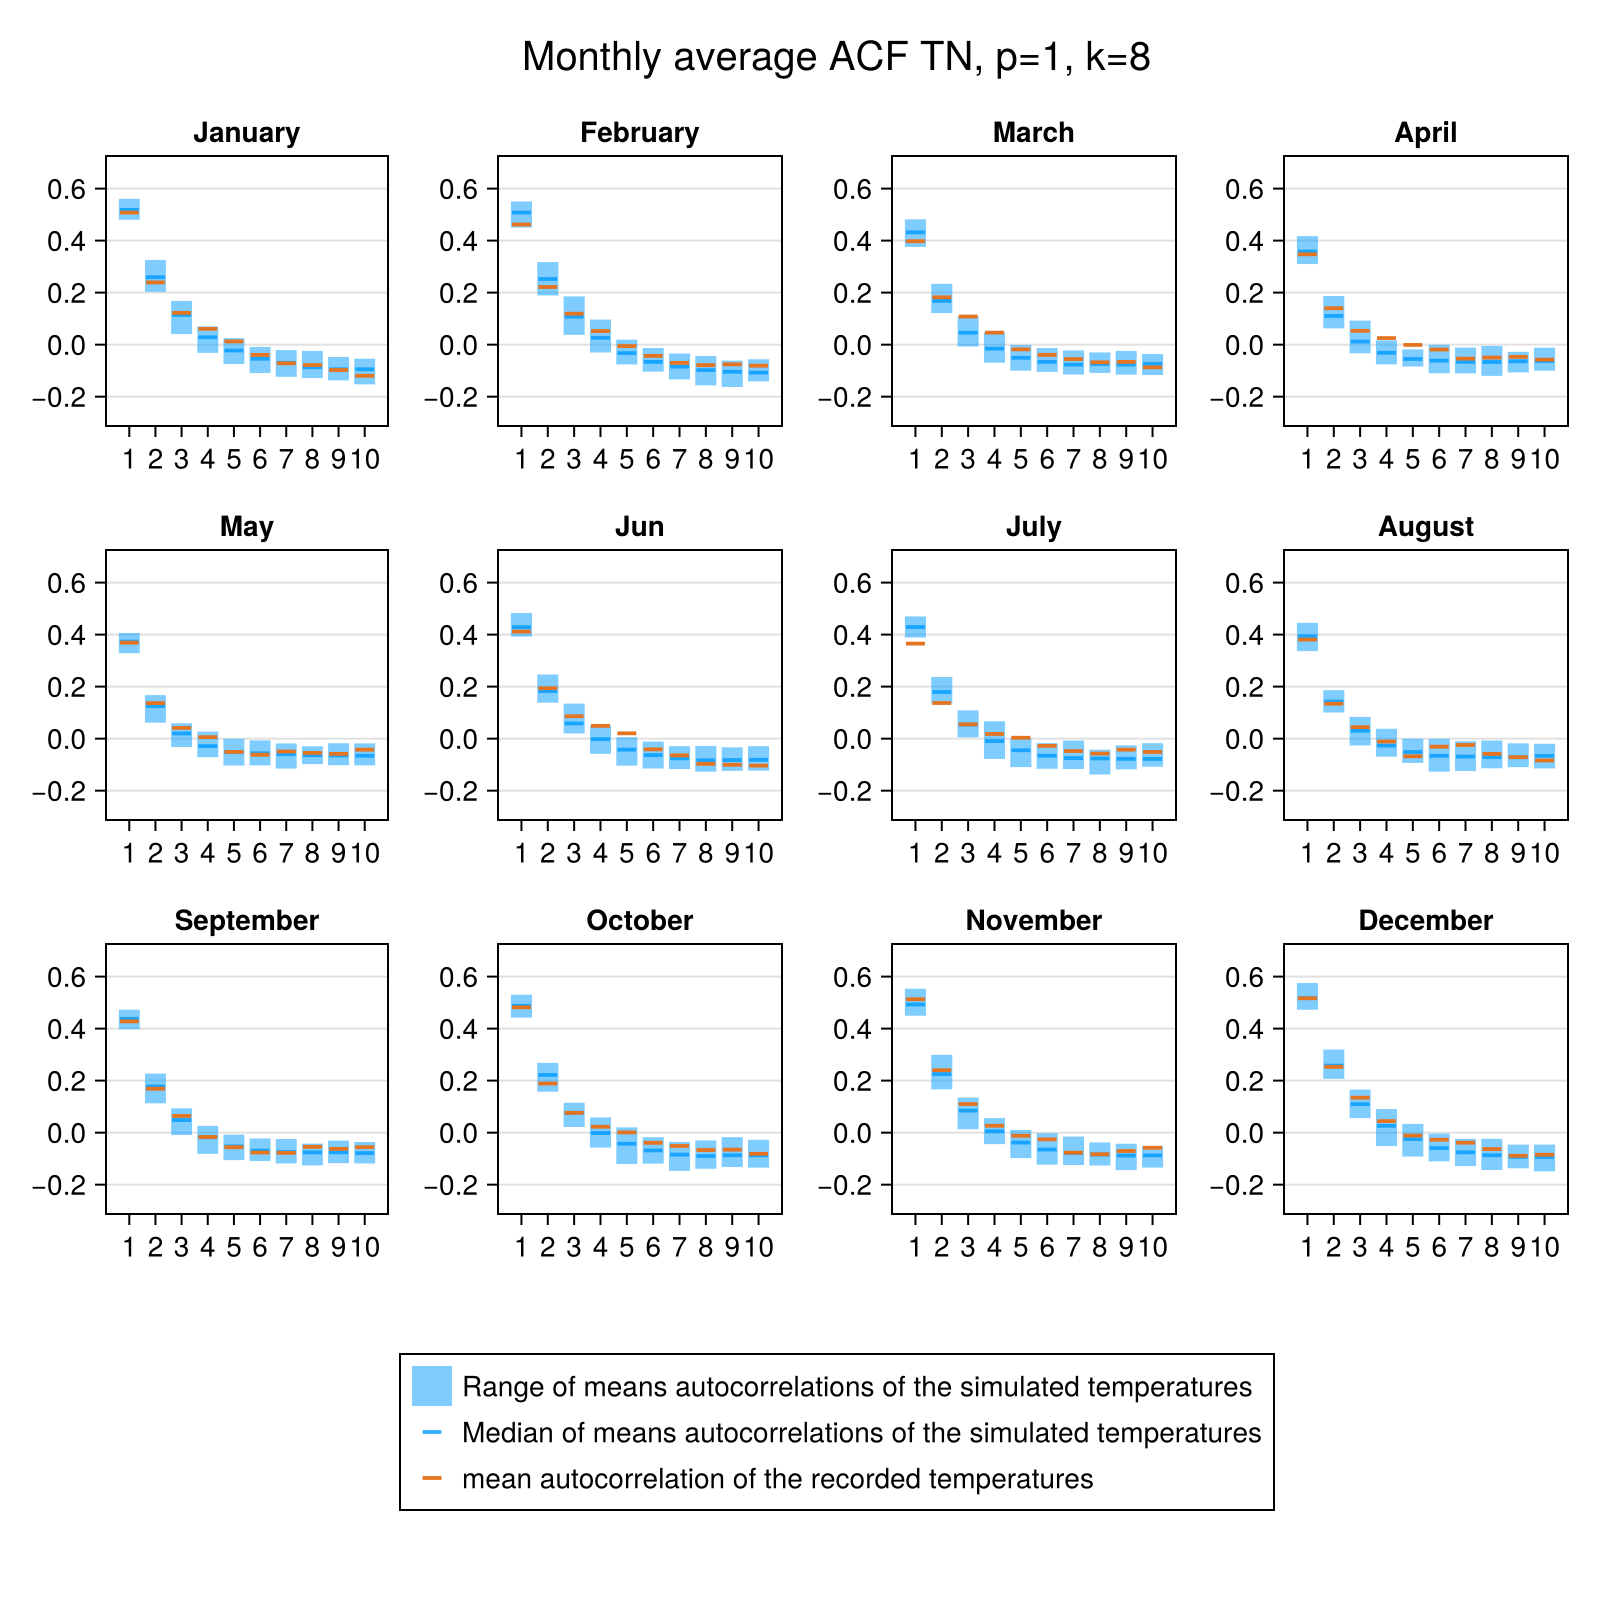

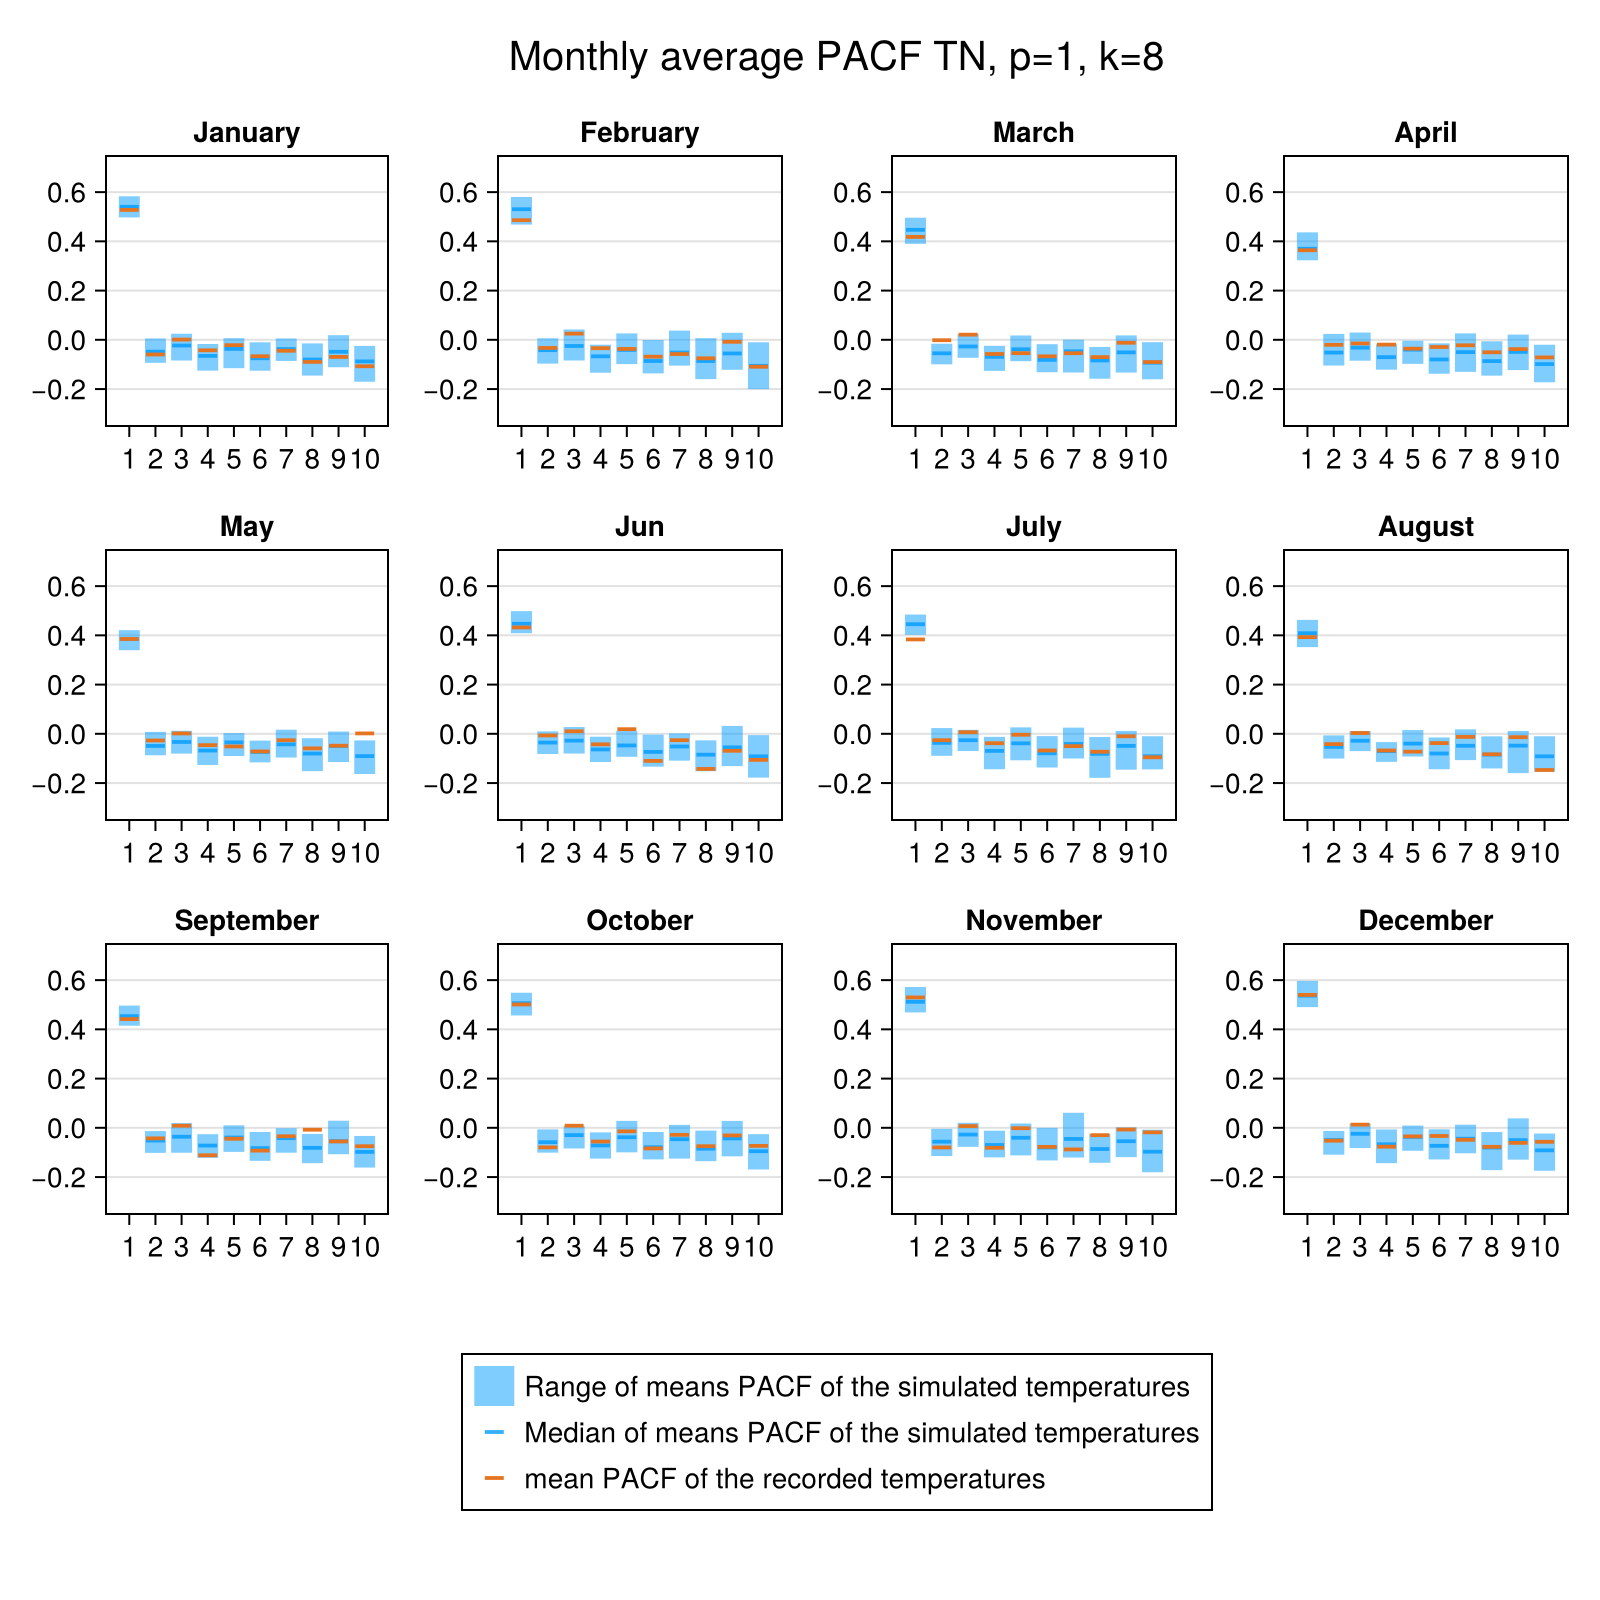

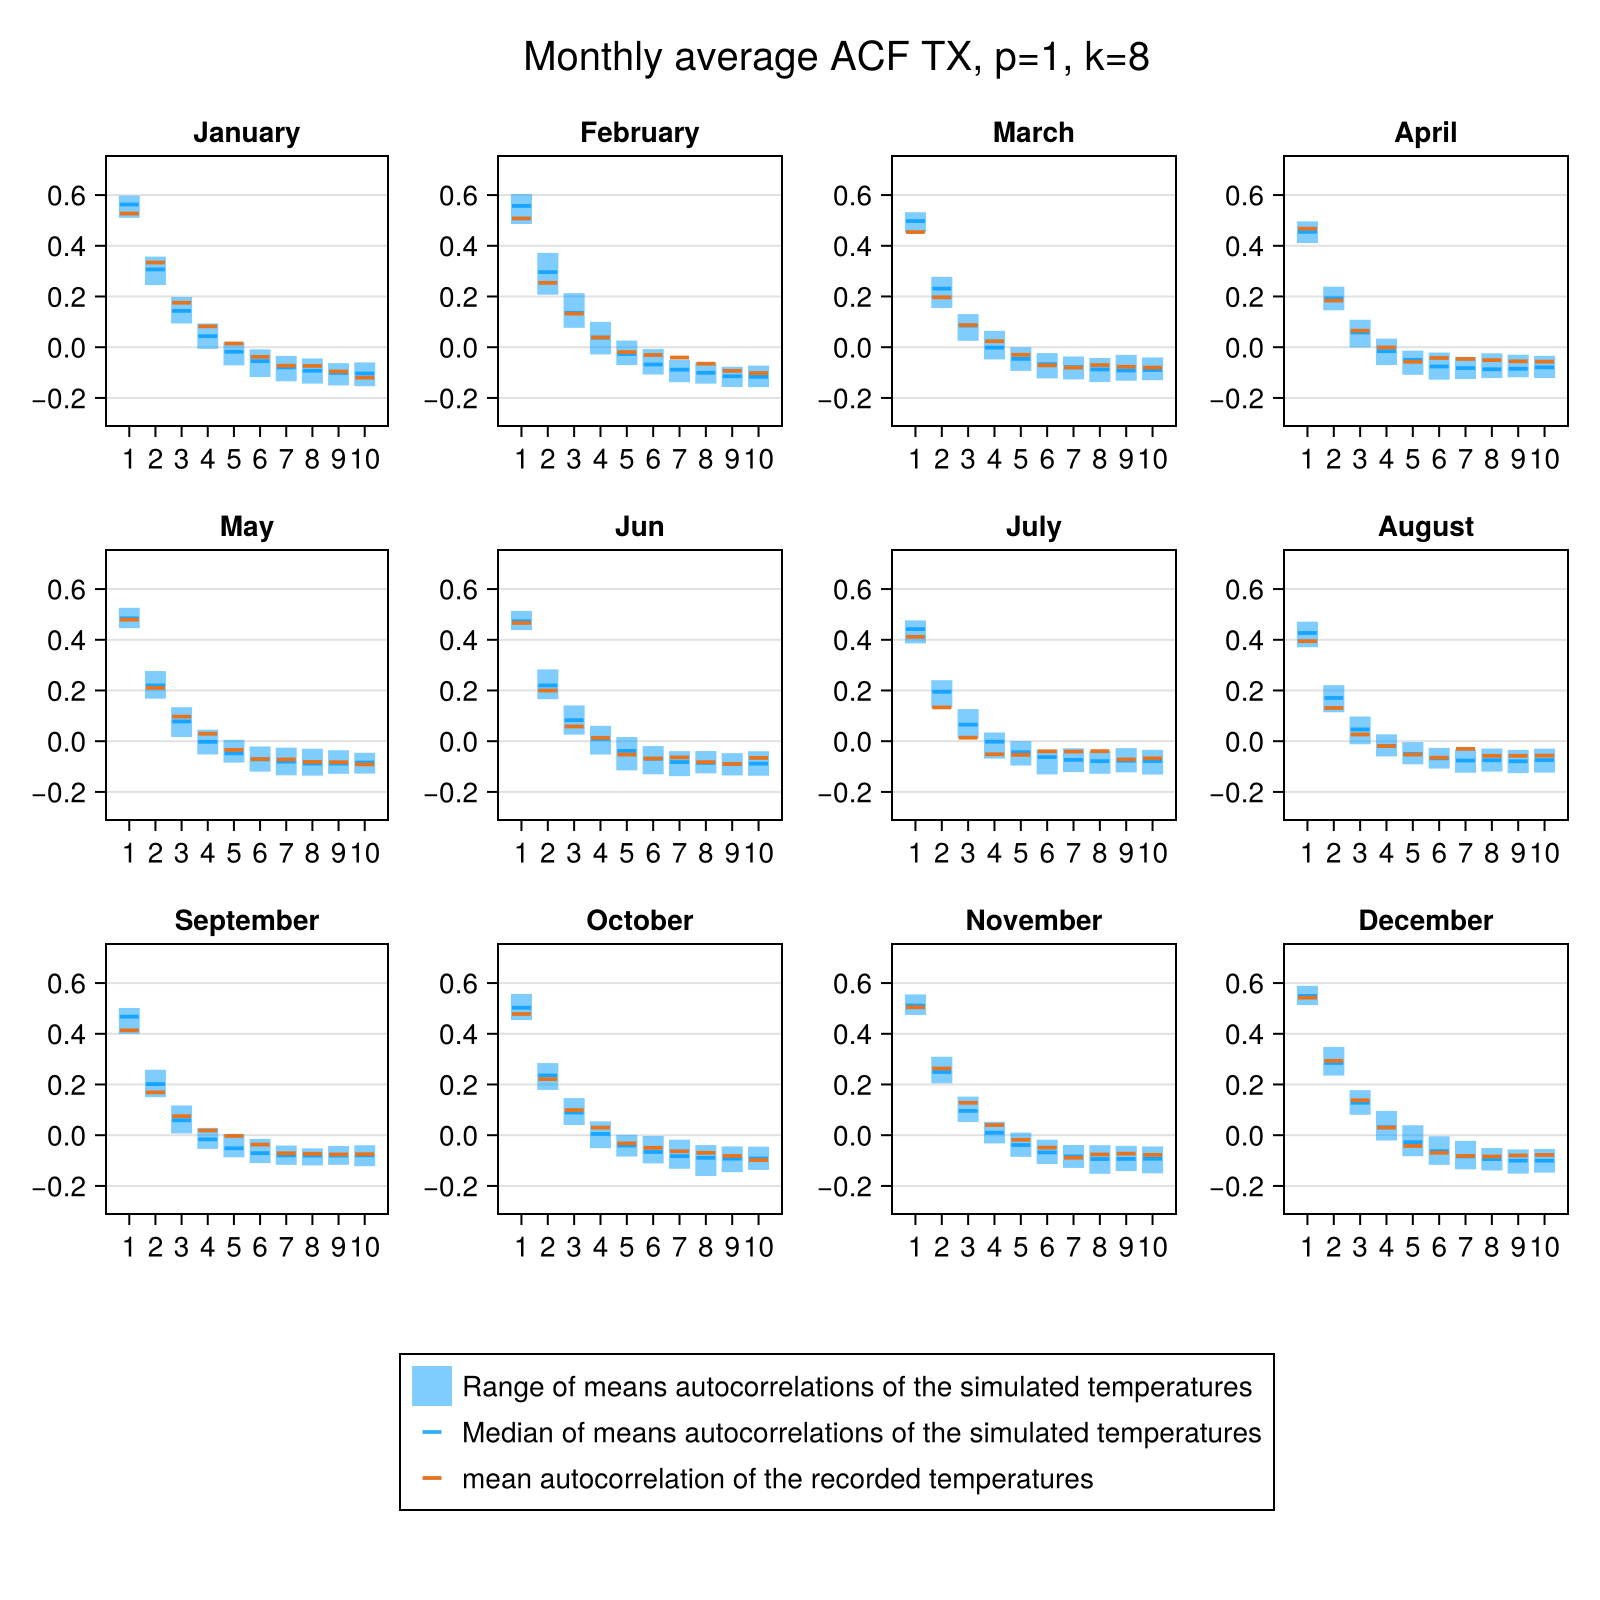

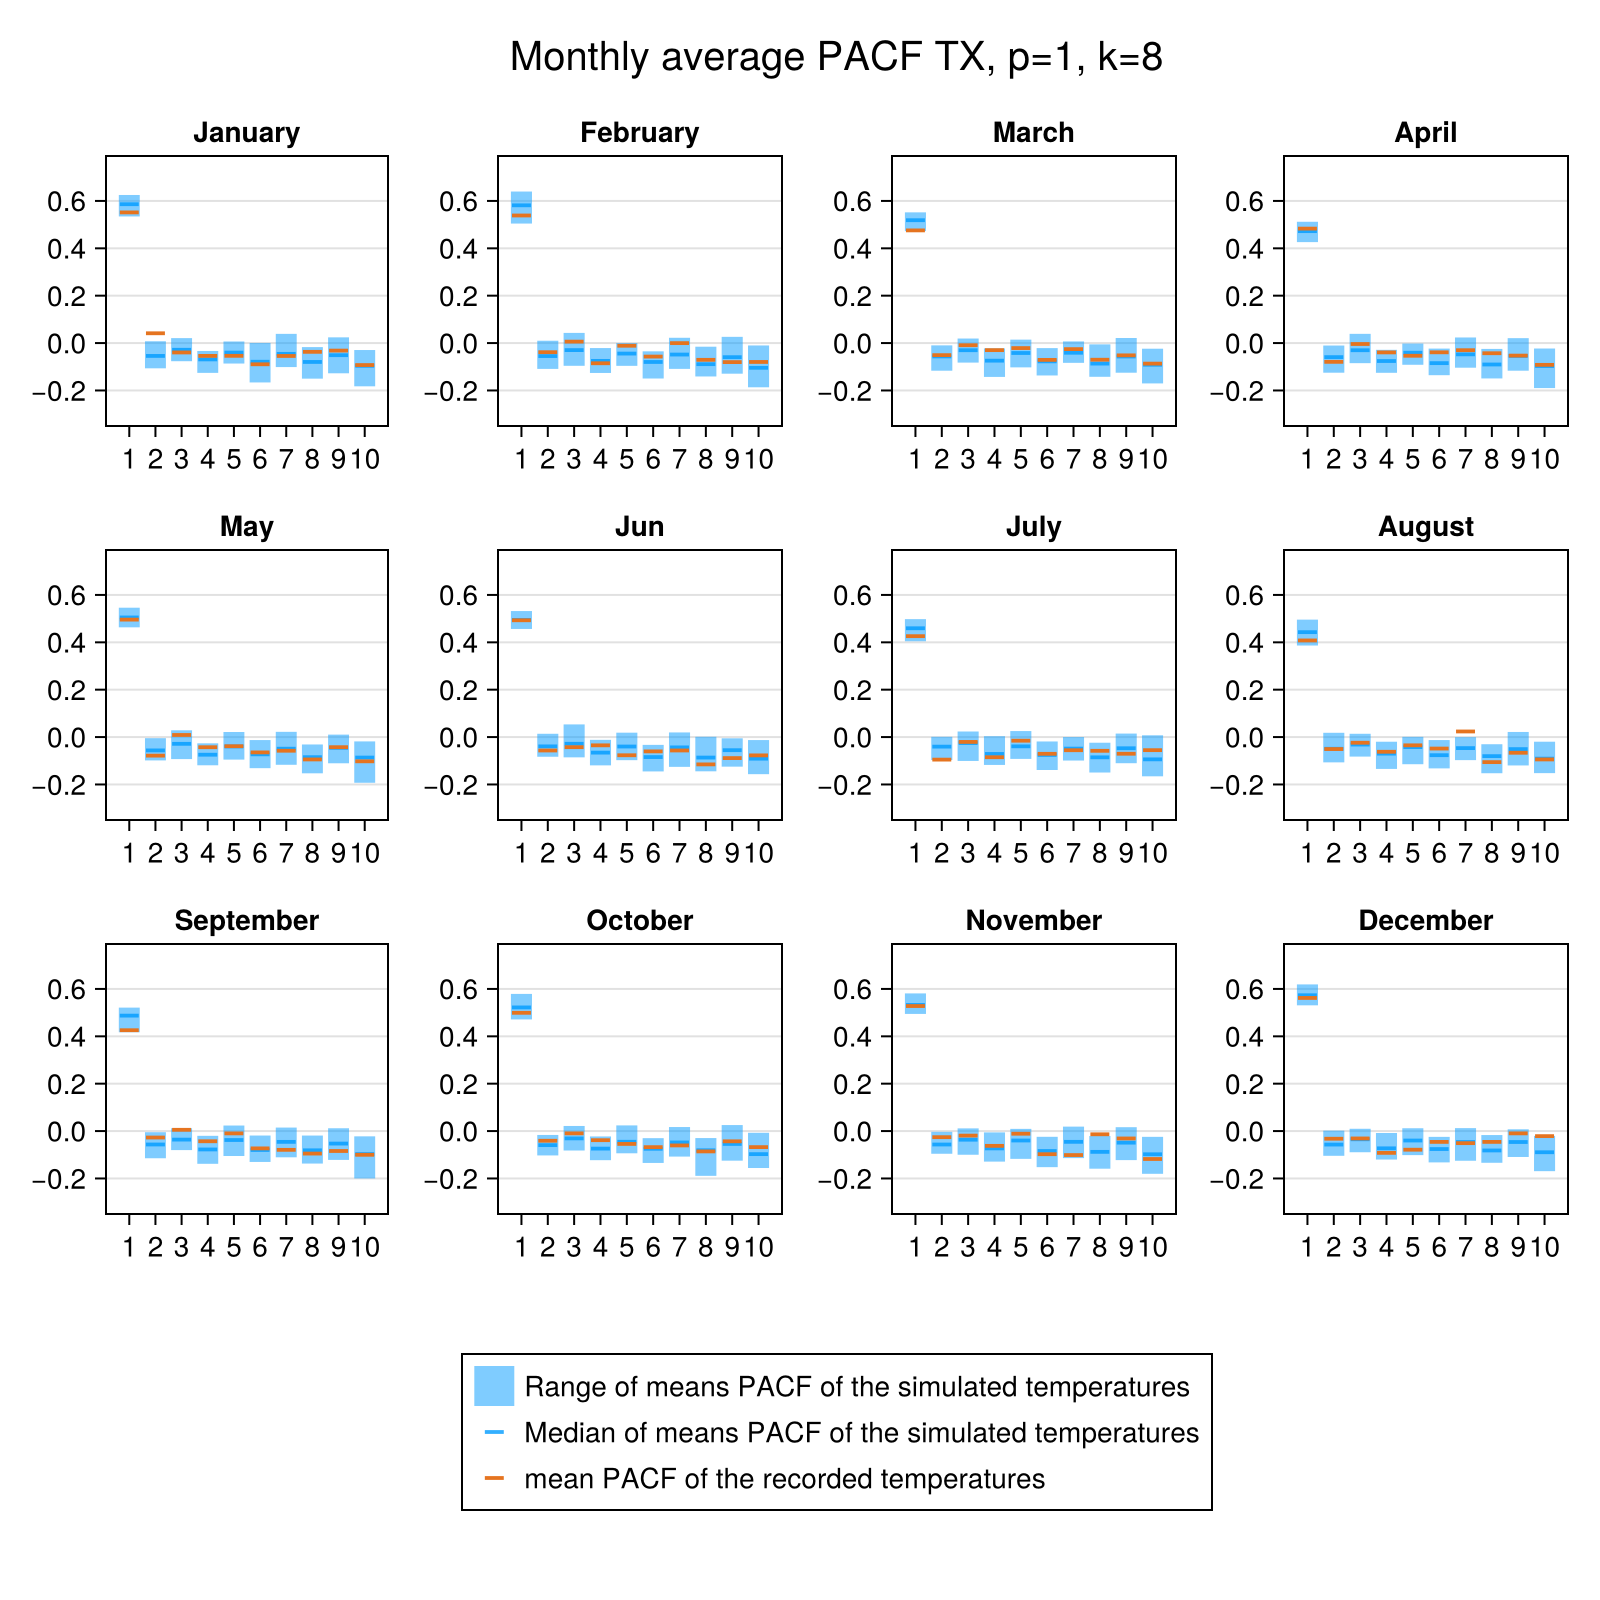

Number of scenarios with dates where TN > TX 100
Percentage of scenarios with dates where TN > TX 100.0 %
Mean percentage of dates where TN > TX : 0.37 %
Median percentage of dates where TN > TX : 0.36 %


In [8]:
fig_tuple = Sample_diagnostic(sample_, Caracteristics_Series_vec, Model, folder=folder_results, settings=settings)
save_model(Model, folder_results * "/model.jld2")
display.(fig_tuple)
println("Number of scenarios with dates where TN > TX $(sum(TN_Grt_TX.(sample_) .> 0))")
println("Percentage of scenarios with dates where TN > TX $(100*trunc(sum(TN_Grt_TX.(sample_) .> 0)/length(sample_),digits=2)) %")
println("Mean percentage of dates where TN > TX : $(trunc(100*mean(TN_Grt_TX.(sample_))/length(Model.date_vec),digits=2)) %")
println("Median percentage of dates where TN > TX : $(trunc(100*median(TN_Grt_TX.(sample_))/length(Model.date_vec),digits=2)) %")